# Lab 13: Tomographic Reconstruction

### Due December 11th, 2021 11:59 PM CST

#### Logistics and Lab Submission

See the [course website](https://courses.engr.illinois.edu/ece365/fa2019/logisticsvvv.html).

This lab covers tomographic reconstruction and a series of problems related to least squares on the space of the orthogonal matrices.

The submission procedure is provided below:
- You will be provided with a template Python script (main.py) for this lab where you need to implement the provided functions as needed for each question. Follow the instructions provided in this Jupyter Notebook (.ipynb) to implement the required functions. **Do not change the file name or the function headers!**
- <b>This lab contains non-programming questions.</b> These questions will be graded manually and their score will appear after the submission deadline. You can write your solutions on paper, scan (or take a photo) of your solutions to these problems and upload them as a pdf file under the name Lab13.pdf.
- Upload <b>BOTH</b> your Python script (.py file) and the pdf file containing your solutions (Lab13.pdf) on Gradescope.
- Your grades and feedbacks will appear on Gradescope. The grading for the programming questions is automated using Gradescope autograder, no partial credits are given. Therefore, if you wish, you will have a chance to re-submit your code **within 72 hours** of receiving your first grade for this lab, only if you have *reasonable* submissions before the deadline (i.e. not an empty script).
- If you re-submit, the final grade for the programming part of this lab will be calculated as .4 \* first_grade + .6 \* .9 \* re-submission_grade.

The purpose of problems titled `Visualization` are to better understand and test your results visually. `Visualization` problems will <b>NOT</b> be graded.

## Please type all your answers to programming problems in *main.py*. 
## You can write your solutions on paper, scan (or take a photo) of your solutions to these problems and upload them as a pdf file under the name Lab13.pdf. You need to submit both *main.py* and *Lab13.pdf*.

#### Preamble (Don't change this)

In [52]:
%pylab inline
import numpy as np
from skimage.transform import radon, iradon, resize
from skimage.data import shepp_logan_phantom
import skimage.filters
import scipy.io

Populating the interactive namespace from numpy and matplotlib


This line runs your python script that you are going to submit. Objects are created for your reference. You can copy-paste this box so you don't need to come up later. **Do not change the file name!**

In [53]:
%run main.py
q1 = Question1()
q2 = Question2()

<Figure size 432x288 with 0 Axes>

## Problem 1 : Orthogonal matrices (60 points)

In the lecture notes, you learned about the common-lines method. As the name suggests, the common-lines method searches for the common lines between any two projection images using least squares where the search space of the  optimization is over the space of rotation matrices denoted by $SO(3)$. The space of rotation matrices is a subspace of orthogonal matrices space denoted by $O(3)$. For any $R \in O(3)$, $R R^T = R^T R = I_{3 \times 3}$ where $I_{3 \times 3}$ is the $3 \times 3$ identity matrix.

Note that having common lines between any two projection images is a direct implication of Central Slice Theorem (CST). You learned about CST in Lab 1.

In this problem, we attempt a series of problems involving orthogonal matrices and least squares on the space of orthogonal matrices. 

### Problem 1-1: Filling in an incomplete orthogonal matrix (10 points)

You are given an incomplete orthogonal matrix $R$. While $R$ is a $3 \times 3$ orthogonal matrix, you are only given two columns of $R$. Describe a procedure to recover the missing column of $R$.

Hint: Remember that for any orthogonal matrix $R$, $R R^T = R^T R = I_{3 \times 3}$.

Add your solution to `Lab13.pdf`. You can write your answer on a paper, take a snapshot of your solution and add it to `Lab13.pdf`. Please mark your solution for this problem with `Problem 1-1`.

### Problem 1-2: Filling in an incomplete orthogonal matrix (Implementation)  (10 points)
Write a function that takes as input an incomplete orthogonal matrix (only the first two columns of this matrix are given) and outputs the full orthogonal matrix. Your function should find the third column of this matrix, concatenate it with the other two comlumns and outputs the $3 \times 3$ completed orthogonal matrix.

Input:
* A np.ndarray of shape $3 \times 2$ containing the first two columns of an orthogonal matrix.

Output:
* A np.ndarray of shape $3 \times 3$ containing the completed orthogonal matrix.

Add your code to `Question1.complete_ortho_matrix` in `main.py`.

### Visualization: Check your solution to problem 1-2

In [54]:
M = np.array([[1./np.sqrt(2), 0], [0, 1], [-1./np.sqrt(2), 0]])
R = q1.complete_ortho_matrix(M)
print('R R^T = {0}\n'.format(np.matmul(R, R.T)))
print('R^T R = {0}'.format(np.matmul(R.T, R)))

R R^T = [[1.00000000e+00 0.00000000e+00 2.23711432e-17]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [2.23711432e-17 0.00000000e+00 1.00000000e+00]]

R^T R = [[ 1.00000000e+00  0.00000000e+00 -2.23711432e-17]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [-2.23711432e-17  0.00000000e+00  1.00000000e+00]]


### Problem 1-3: Recovering an orthogonal matrix (10 points)

You are given a matrix $M \in \mathbb{R}^{3\times 3}$ with a singular value decomposition $M = U \Sigma V^T$ where $U U^T = U^T U = I$ and $V V^T = V^T V= I$ ($I$ is the $3 \times 3$ identity matrix). Also, $U = [u_1, u_2, u_3]$ and $V = [v_1, v_2, v_3]$ where $\{u_i\}_{i=1}^3$ and $\{v_i\}_{i=1}^3$ are columns of $U$ and $V$ respectively. Also, $\Sigma$ is a diagonal matrix containing the non-negative singular values, i.e. 
\begin{align}
\Sigma = 
\begin{bmatrix}
\sigma_1 & 0 & 0 \\
0 & \sigma_2 & 0 \\
0 & 0 & \sigma_3
\end{bmatrix}.
\end{align}

We want to find an orthogonal matrix that is closest to $M$. For this purpose, we solve the following optimization problem:
\begin{align}
R^* = \text{arg} \min_{R^T R = R R^T = I} \Vert M - R \Vert^2_F
\tag 1
\end{align}
where $R^*$ is the solution to the optimization problem and $\Vert . \Vert_F$ denotes the Frobenius norm. The Frobenius norm of a matrix $A \in \mathbb{R}^{m \times n}$ with $a_{i, j}$ as its $(i, j)$-th element is defined as $\Vert A \Vert_F^2 = \sum\limits_{i=0}^{m-1} \sum\limits_{j=0}^{n-1} a_{i, j}^2$. We aim to show that the solution to (1) is $R^* = U V^T$. Below, we write our proof step-by-step. In the proof below, there are several steps missing. You are asked to fill in the missing steps marked in red.

<b>Proof:</b>

\begin{align}
&\min_{R^T R = R R^T = I} \Vert M - R \Vert_F^2 \\
& \color{red}{...\text{S1}...} \\
& \equiv \max_{R^T R = R R^T = I} Tr(M R^T + R M^T) \\
& \color{red}{...\text{S2}...} \\
& = \max_{R^T R = R R^T = I} Tr(M R^T) \\
& = \max_{R^T R = R R^T = I} Tr(U \Sigma V^T R^T) \\
& = \max_{R^T R = R R^T = I} Tr \sum\limits_{i=1}^3 \sigma_i u_i v_i^T R^T \\
& \color{red}{...\text{S3}...} \\
& = \max_{R^T R = R R^T = I} \sum\limits_{i=1}^3 \sigma_i <u_i, R v_i> \\
\end{align}

The above expression is maximized when $u_i = \alpha_i R v_i$, $\forall i$, where $\alpha_i$ is a non-negative constant. Given that $\Vert u_i \Vert_2 = \Vert R v_i \Vert_2 = \Vert v_i \Vert_2 = 1$, $\alpha_i = 1$. So, this means we need to find $R \in O(3)$ such that $u_i = R v_i$, $\forall i$. Let's stack the equations $u_i = R v_i$, for $i = \{1, 2, 3\}$ in the following matrix:
\begin{align}
[u_1, u_2, u_3] & = [R v_1, R v_2, R v_3] \\
& = R [v_1, v_2, v_3]
\end{align}
where we have stacked $\{u_i\}_{i=1}^3$ and $\{R v_i\}_{i=1}^3$ column wise. Note that, $[u_1, u_2, u_3] = U$ and $[v_1, v_2, v_3] = V$. Thus, based on above equation we end up with:
\begin{align}
& U = R V \\
& \color{red}{...\text{S4}...} \\
& R = U V^T
\end{align}
This concludes the proof.

Hints: 
* Remember that for any orthogonal matrix $R$, $R R^T = I$ and $R^T R = I$.
* $\Vert A \Vert^2_F = Tr(A A^T)$
* $Tr(AB) = Tr(BA)$

Add your solution to `Lab13.pdf`. You can write your answer on a paper, take a snapshot of your solution and add it to `Lab13.pdf`. Please mark your solution for this problem with `Problem 1-3`.

### Problem 1-4: Check your solution to Problem 1-3  (10 points)

Write a function that takes as input a matrix $M \in \mathbb{R}^{3 \times 3}$ and outputs the closest orthogonal matrix to $M$.

Inputs: 
* $M \in \mathbb{R}^{3 \times 3}$, a np.ndarray of shape $3 \times 3$

Output:
* The orthogonal matrix $R$ that is closest to $M$ (have the least $\Vert M - R\Vert_F^2$)

Add your code to `Question1.recover_ortho_matrix` in `main.py`.

In [55]:
M = np.random.normal(size=(3, 3))
M /= np.sqrt(np.sum(M**2, 0))
R = q1.recover_ortho_matrix(M)
print('R R^T = {0}\n'.format(np.matmul(R, R.T)))
print('R^T R = {0}'.format(np.matmul(R.T, R)))

R R^T = [[ 1.00000000e+00  6.29360114e-16 -4.38218238e-16]
 [ 6.29360114e-16  1.00000000e+00  1.04277620e-16]
 [-4.38218238e-16  1.04277620e-16  1.00000000e+00]]

R^T R = [[ 1.00000000e+00 -1.19513916e-17  1.52618886e-16]
 [-1.19513916e-17  1.00000000e+00 -3.15919762e-16]
 [ 1.52618886e-16 -3.15919762e-16  1.00000000e+00]]


### Problem 1-5: Matrix completion and recovering an orthogonal matrix (10 points)
Assume we have a matrix $M \in \mathbb{R}^{3 \times 2}$. Based on your solutions to problem 1-1 and 1-2, describe a procedure that finds an orthogonal matrix so that the first two columns of the orthogonal matrix are closest to $M$ in a Frobenius norm sense. 

Add your solution to `Lab13.pdf`. You can write your answer on a paper, take a snapshot of your solution and add it to `Lab13.pdf`. Please mark your solution for this problem with `Problem 1-5`.

### Problem 1-6: Matrix completion and recovering an orthogonal matrix (Implementation) (10 points)
Write a function that takes as input a matrix $M \in \mathbb{R}^{3 \times 2}$ and outputs an orthogonal matrix which has the first two columns to be closest to $M$ (has the least Frobinus norm).

Inputs: 
* $M \in \mathbb{R}^{3 \times 2}$, a np.ndarray of shape $3 \times 2$

Output:
* The orthogonal matrix $R$ where its first to columns are closest to $M$ (has the least Frobinus norm)

Add your code to `Question1.comp_rec_ortho_matrix` in `main.py`.

In [56]:
M = np.random.normal(size=(3, 2))
M /= np.sqrt(np.sum(M**2, 0))
R = q1.comp_rec_ortho_matrix(M)
print('R R^T = {0}\n'.format(np.matmul(R, R.T)))
print('R^T R = {0}'.format(np.matmul(R.T, R)))

R R^T = [[ 1.00000000e+00 -1.97851092e-17  1.53863229e-16]
 [-1.97851092e-17  1.00000000e+00  6.99398025e-17]
 [ 1.53863229e-16  6.99398025e-17  1.00000000e+00]]

R^T R = [[ 1.00000000e+00 -1.08948843e-16  8.03560558e-17]
 [-1.08948843e-16  1.00000000e+00  4.50356941e-17]
 [ 8.03560558e-17  4.50356941e-17  1.00000000e+00]]


## Problem 2: 2D Tomographic Reconstruction (20 points)

Tomographic reconstruction is the process of reconstructing a 2D/3D object given its projections. In this excercise, we study tomographic reconstruction of a 2D image. Let's officially state the problem below:

Problem statement: We have an image $I$. The projection of $I$ along the angle $\theta$ is $\mathcal{P}_\theta I$ which can be contaminated with additive Gaussian noise $\varepsilon$, i.e. $y = \mathcal{P}_\theta I + \varepsilon$. We have $N$ noisy projections of $I$, i.e. $ \{y_i\}_{i=1}^{N} = \{ \mathcal{P}_{\theta_i} I + \varepsilon_i\}_{i=1}^{N}$ and $I$ is unknown. The tomographic reconstruction problem tries to reconstruct $I$ given the projections $\{y_i\}_{i=1}^{N}$.

Let's consider the following two cases:
* The projection angles $\{\theta_i\}_{i=1}^{N}$ are known. This is the case in medical imaging applications.
* The projection angles $\{\theta_i\}_{i=1}^{N}$ are unknown. This is the case in cryo-EM applications. 

In the first case, we need to solve a linear problem to find $I$. However, this is not the case when $\{\theta_i\}_{i=1}^{N}$ are unknown. 

In this excercise, you are asked to:

* Derive the likelihood and the posterior probability expressions given that we have Gaussian additive noise on the projections.
* Implement a simple version of template matching to reconstruct $I$ given its projections $\{y_i\}_{i=1}^{N}$, when $\{\theta_i\}_{i=1}^{N}$ are unknown.

### Problem 2-1: MLE and MAP (10 points)
We review the tomographic projection model as,
\begin{align}
y_i = \mathcal{P}_{\theta_i} I + \varepsilon_i, \quad i = \{1, ..., N\}
\tag 2
\end{align}
where $y_i \in \mathbb{R}^d$, $I \in \mathbb{R}^n$ (where $d \geq n$) and $\varepsilon_i \in \mathbb{R}^d$ and $\varepsilon_i \sim \mathcal{N}(0_d, \sigma^2 I_{d \times d})$.

Given the tomographic measurement model, express the likelihood and posterior probability distributions. Note that the likelihood is defined as $P(y_1, y_2, ..., y_N \vert I, \theta_1, \theta_2, ..., \theta_N)$ and the posterior is $P(I \vert y_1, y_2, ..., y_N)$.

Add your solution to `Lab13.pdf`. You can write your answer on a paper, take a snapshot of your solution and add it to `Lab13.pdf`. Please mark your solution for this problem with `Problem 2-1`.

### Problem 2-2: Unknown view tomographic reconstruction using Template Matching (10 points)
Consider the tomographic projection model in (2). Let's assume that we are only given $\{y_i\}_{i=1}^{N}$, and $\{\theta_i\}_{i=1}^{N}$ and $I$ are unknown. Our goal is to recover $I$ from the measurements $\{y_i\}_{i=1}^{N}$ starting from an initial image $I_0$. For this purpose, we use template matching.

Template matching is an iterative algorithm which iterates between updating the image $I$ and the projection angles $\{\theta_i\}_{i=1}^{N}$. The outline of template matching algorithm is defined below:

<b>Template matching algorithm</b>

Inputs: Noisy projections $\{y_i\}_{i=1}^{N}$, an initial image $I_0$, $T_{max}$ number of template matching iterations.

Output: Recovered image $\widehat{I}$.

$t = 0$

While $t<T_{max}$:
* Update the projection angles
    * Genarate projection templates $\gamma_k$, $k = \{0, 1, ..., M-1\}$. $\gamma_k = \mathcal{P}_{\phi_k} I_0$, $\phi_k = \frac{2 \pi k}{M}$.
    * Compute the correlation between any template $\gamma_k$ and any noisy projection $y_i$.
    * For each projection $y_i$, assign $\theta_i = \phi_\ell$ where $\ell = arg \max_{k} \frac{<y_i, \gamma_k>}{\Vert \gamma_k \Vert_2}$.
    
* Update the image
    * Given the noisy projections $\{y_i\}_{i=1}^{N}$ and the current values of projection angles $\{\theta_i\}_{i=1}^{N}$, update the image.
    
* $t += 1$
Note that in the above algorithm, $t$ denotes the iteration.
***
Write a function that implements the template matching algorithm.

The inputs:
* The noisy projections $\{y_i\}_{i=1}^{N}$. A np.ndarray of size $d \times n$.
* An initial image $I_0$. A np.ndarray of size $n \times n$.
* $M$, a scalar, the number of uniformly distributed projection angles, used to generate the templates.
* $T_{max}$, the number of template matching iterations.

The output:
* The recovered image $\widehat{I}$. A numpy array of shape $m \times m$.
* The estimates projection angles $\{\theta_i\}_{i=1}^N$.

In "Updating the projection angles" and "Update the image" steps, you can use `radon` and `iradon` functions from `skimage` package.

Add your code to `Question2.template_matching` in `main.py`.

### Visualization: Template matching
Let's use the example below in order to test your template matching algorithm.

In [57]:
M = 200
Tmax = 100
mat = scipy.io.loadmat('problem2_2.mat')
projs = mat['projs']
I_init1 = mat['I_init1']
I_init2 = mat['I_init2']
image = mat['image']

The projections $\{y_i\}_{i=1}^{N}$:

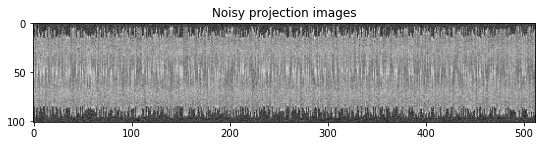

In [58]:
plt.figure(figsize=(9, 12))
plt.imshow(projs, cmap='gray')
plt.title('Noisy projection images')
plt.show()

Now, let's try template matching with two different initializations and compare their results below.

In [59]:
I_rec1, theta1 = q2.template_matching(projs, I_init1, M, Tmax)
I_rec2, theta2 = q2.template_matching(projs, I_init2, M, Tmax)

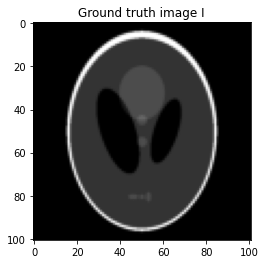

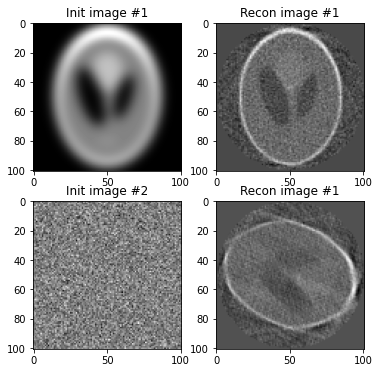

In [60]:
plt.figure()
plt.imshow(image, cmap='gray')
plt.title('Ground truth image I')
plt.show()
    
fig, axes = plt.subplots(2, 2, figsize=(6, 6))
axes[0, 0].imshow(I_init1, cmap='gray')
axes[0, 0].set_title('Init image #1')

axes[0, 1].imshow(I_rec1, cmap='gray')
axes[0, 1].set_title('Recon image #1')

axes[1, 0].imshow(I_init2, cmap='gray')
axes[1, 0].set_title('Init image #2')

axes[1, 1].imshow(I_rec2, cmap='gray')
axes[1, 1].set_title('Recon image #1')
plt.show()

# What happens when the quality of the initial image $I_0$ degrades or when we have a random initialization?

## And this concludes Lab 13! Congratulations!